In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import scipy.stats as st
import random
import seaborn as sns

#             NETTOYAGE DES DONNES

In [2]:
# Nous allons travailler ici avec le fichier csv: customers
customers = pd.read_csv("C:/Users/Utilisateur/projet 4/customers.csv")
customers

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
...,...,...,...
8618,c_7920,m,1956
8619,c_7403,f,1970
8620,c_5119,m,1974
8621,c_5643,f,1968


Ce dataframe est composé de 3 colonnes (client_id, sex, et birth) ainsi que 8623 lignes 

In [3]:
# Nous allons voir ce que contient le dataframe customers en utilisant la fonction describe()
customers.describe()

,birth
count,8623.000000
mean,1978.280877
std,16.919535
min,1929.000000
25%,1966.000000
50%,1979.000000
75%,1992.000000
max,2004.000000


# 1- Recherche des valeurs aberrantes dans le Daframe Customers

In [4]:
#Nous regardons dans client_id comment sont_ils composés
customers.client_id.unique()

array(['c_4410', 'c_7839', 'c_1699', ..., 'c_5119', 'c_5643', 'c_84'],
      dtype=object)

In [5]:
message =  "on constate que les id_clients commencent par 'c_{n° séquentiel}'\
Donc on va vérifier que c'est toujours vrai pour éliminer d'eventuelles exceptions"

In [6]:
# Vérifions que tous les client_id commencent par c_
customers_exceptions = customers[customers["client_id"].str.startswith("c_") ==  False]
customers_exceptions

,client_id,sex,birth
2735,ct_0,f,2001
8494,ct_1,m,2001


In [7]:
message = " On remarque qu'il y a deux identifiants de client_id qui commencent par ct \
nous allons les identifier et voir à quoi ils correspondent dans la suite de l'analyse en trouvant des\
corrélations avec les autres dataframes"

In [8]:
#Nous allons faire un masque de customers pour avoir uniquement dans la colonne client_id  les élements commençant 
# que par 'c' car se sont les plus majoritaires 
customers_filter = customers[customers["client_id"].str.startswith("c_")]
customers_filter.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


# 2- Recherche des valeurs manquantes dans le DataFrame customers

In [9]:
customers_filter_manquant = pd.isna(customers_filter)
customers_filter_manquant.head()

,client_id,sex,birth
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False


In [10]:
#Masque colonne client_id
customers_filter_manquant[customers_filter_manquant["client_id"] == True]

,client_id,sex,birth


In [11]:
# Masque colonne sex
customers_filter_manquant[customers_filter_manquant["sex"] == True]

,client_id,sex,birth


In [12]:
# Masque colonne bith
customers_filter_manquant[customers_filter_manquant["birth"] == True]

,client_id,sex,birth


In [13]:
Conclusion_valeurs_manquantes = "il n'y pas de valeurs manquantes dans le Dataframe customers"

# 3- Recherche de doublons dans le DataFrame customers

Nous allons rechercher les doublons dans le dataframe customers et supprimer toutes les lignes en double avec la fonction drop_duplicates()

In [14]:
customers_filter.drop_duplicates


<bound method DataFrame.drop_duplicates of      client_id sex  birth
0       c_4410   f   1967
1       c_7839   f   1975
2       c_1699   f   1984
3       c_5961   f   1962
4       c_5320   m   1943
...        ...  ..    ...
8618    c_7920   m   1956
8619    c_7403   f   1970
8620    c_5119   m   1974
8621    c_5643   f   1968
8622      c_84   f   1982

[8621 rows x 3 columns]>

### Calcul de l'âge de chaque client 

In [15]:
customers_filter["age"] = 2022 - customers_filter["birth"]
customers_filter.head()

<ipython-input-15-2891c1c7cd23>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers_filter["age"] = 2022 - customers_filter["birth"]


,client_id,sex,birth,age
0,c_4410,f,1967,55
1,c_7839,f,1975,47
2,c_1699,f,1984,38
3,c_5961,f,1962,60
4,c_5320,m,1943,79


 CONCLUSION NETTOYAGE DE DONNEES DU DATAFRAME CUSTOMERS

1- Nous avons au total 8623 lignes et 3 colonnes (client_id, sex, birth)

2- Nous avons deux lignes ct_0  et ct_1	 qui sont différentes des autres au niveau de la colonne client_id. Les autres client_id commencent par c_

3- Nous n'avons pas trouvé de valeurs manquantes

4- Nous n'avons pas trouvé des doublons

Nous allons pousuivre notre analyse pour savoir à quoi correspond les identifiants ct_0 et ct_1

PREMIER PROBLEME RENCONTRE: CT_0 ET CT_1

# Dataframe Products

# 1- Recherche des valeurs aberrantes dans le DataFrame products

In [16]:
products = pd.read_csv("C:/Users/Utilisateur/projet 4/products.csv")
products.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [17]:
# Analyse rapide du dataframe products avec la fonction describe()
products.describe()

,price,categ
count,3287.000000,3287.000000
mean,21.856641,0.370246
std,29.847908,0.615387
min,-1.000000,0.000000
25%,6.990000,0.000000
50%,13.060000,0.000000
75%,22.990000,1.000000
max,300.000000,2.000000


# 1- Recherche des valeurs aberrantes du Dataframe products

In [18]:
# valeurs abérrantes sur les prix
products_price_aberrant = products[products["price"] < 0]
products_price_aberrant

,id_prod,price,categ
731,T_0,-1.0,0


In [19]:
# Notre Dataframe devient: 
product_filter = products[products["price"] >= 0]
product_filter.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [20]:
# Dans la colonne categ, affichons les différentes categorie du dataframe products
product_filter.categ.unique()

array([0, 1, 2], dtype=int64)

# 2- Recherche des valeurs manquantes dans le dataframe product_filter

In [21]:
product_filter_valeur_manquantes = pd.isna(product_filter)
product_filter_valeur_manquantes.head()

,id_prod,price,categ
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False


In [22]:
# On fait une recherche en True pour voir s'il y a des valeurs manquantes

product_filter_valeur_manquantes[product_filter_valeur_manquantes["id_prod"] == True]

,id_prod,price,categ


In [23]:
product_filter_valeur_manquantes[product_filter_valeur_manquantes["price"] == True]

,id_prod,price,categ


In [24]:
product_filter_valeur_manquantes[product_filter_valeur_manquantes["categ"] == True]

,id_prod,price,categ


# 3- Recherche des doublons dans le DataFrame product_filter

In [25]:
product_filter = product_filter.drop_duplicates()
product_filter

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3282,2_23,115.99,2
3283,0_146,17.14,0
3284,0_802,11.22,0
3285,1_140,38.56,1


# Dataframe transactions

In [26]:
transactions = pd.read_csv ("C:/Users/Utilisateur/projet 4/transactions.csv")
transactions.head()

,id_prod,date,session_id,client_id
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242


In [27]:
# Analyse rapide du dataframe transaction avec la fonction describe()
transactions.describe()

,id_prod,date,session_id,client_id
count,337016,337016,337016,337016
unique,3266,336855,169195,8602
top,1_369,test_2021-03-01 02:30:02.237413,s_0,c_1609
freq,1081,13,200,12855


# 1- Recherche des valeurs aberrantes dans le DataFrame transactions

In [28]:
transactions.client_id.unique()

array(['c_4450', 'c_277', 'c_4270', ..., 'c_5139', 'c_4679', 'c_8005'],
      dtype=object)

In [29]:
transactions_exceptions = transactions[transactions["client_id"].str.startswith("c_") == False]
transactions_exceptions

,id_prod,date,session_id,client_id
1431,T_0,test_2021-03-01 02:30:02.237420,s_0,ct_1
2365,T_0,test_2021-03-01 02:30:02.237446,s_0,ct_1
2895,T_0,test_2021-03-01 02:30:02.237414,s_0,ct_1
5955,T_0,test_2021-03-01 02:30:02.237441,s_0,ct_0
7283,T_0,test_2021-03-01 02:30:02.237434,s_0,ct_1
...,...,...,...,...
332594,T_0,test_2021-03-01 02:30:02.237445,s_0,ct_0
332705,T_0,test_2021-03-01 02:30:02.237423,s_0,ct_1
332730,T_0,test_2021-03-01 02:30:02.237421,s_0,ct_1
333442,T_0,test_2021-03-01 02:30:02.237431,s_0,ct_1


In [30]:
transactions_exceptions = transactions[transactions["date"].str.startswith("test_")]
transactions_exceptions

,id_prod,date,session_id,client_id
1431,T_0,test_2021-03-01 02:30:02.237420,s_0,ct_1
2365,T_0,test_2021-03-01 02:30:02.237446,s_0,ct_1
2895,T_0,test_2021-03-01 02:30:02.237414,s_0,ct_1
5955,T_0,test_2021-03-01 02:30:02.237441,s_0,ct_0
7283,T_0,test_2021-03-01 02:30:02.237434,s_0,ct_1
...,...,...,...,...
332594,T_0,test_2021-03-01 02:30:02.237445,s_0,ct_0
332705,T_0,test_2021-03-01 02:30:02.237423,s_0,ct_1
332730,T_0,test_2021-03-01 02:30:02.237421,s_0,ct_1
333442,T_0,test_2021-03-01 02:30:02.237431,s_0,ct_1


In [31]:
transactions_filter = transactions[transactions["client_id"].str.startswith("c_") == True]
transactions_filter.head()

,id_prod,date,session_id,client_id
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242


# 2 - Traitement des valeurs manquantes dans le DataFrame transactions¶

In [32]:
transactions_valeurs_manquantes = pd.isna(transactions_filter)
transactions_valeurs_manquantes.head()

,id_prod,date,session_id,client_id
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False


In [33]:
transactions_valeurs_manquantes[transactions_valeurs_manquantes["id_prod"] == True]

,id_prod,date,session_id,client_id


In [34]:
transactions_valeurs_manquantes[transactions_valeurs_manquantes["date"] == True]

,id_prod,date,session_id,client_id


In [35]:
transactions_valeurs_manquantes[transactions_valeurs_manquantes["session_id"] == True]

,id_prod,date,session_id,client_id


In [36]:
transactions_valeurs_manquantes[transactions_valeurs_manquantes["client_id"] == True]

,id_prod,date,session_id,client_id


# 3- Recherche des doublons dans le DataFrame transactions

In [37]:
transactions_filter = transactions_filter.drop_duplicates()
transactions_filter.head()

,id_prod,date,session_id,client_id
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242


### La date du dataframe transaction n'est pas dans un format approprié , nous allons le mettre au format année_mois, année, jour, et mois 

In [38]:
#Tout d'abord on convertie la date en format pouvant être modifié avec la fonction to_datetime de pandas.
# Pour cela on crée la colonne date_time 
transactions_filter["date_time"] = pd.to_datetime(transactions_filter["date"])

In [39]:
# On crée une colonne année_mois_jour
transactions_filter["YearMonthDay"] = transactions_filter.date_time.dt.strftime("%Y_%m_%d")

In [40]:
# On convertie la date aussi en mois et année
transactions_filter["YearMonth"] = transactions_filter.date_time.dt.strftime("%Y_%m")

In [41]:
# on convertie la date en jour, mois et année séparement
transactions_filter["Year"], transactions_filter["Month"], transactions_filter["Day"] =\
transactions_filter["date_time"].dt.year, transactions_filter["date_time"].dt.month, transactions_filter["date_time"].dt.day 
transactions_filter.head()

,id_prod,date,session_id,client_id,date_time,YearMonthDay,YearMonth,Year,Month,Day
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,2021-04-10 18:37:28.723910,2021_04_10,2021_04,2021,4,10
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,2022-02-03 01:55:53.276402,2022_02_03,2022_02,2022,2,3
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,2021-09-23 15:13:46.938559,2021_09_23,2021_09,2021,9,23
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,2021-10-17 03:27:18.783634,2021_10_17,2021_10,2021,10,17
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,2021-07-17 20:34:25.800563,2021_07_17,2021_07,2021,7,17


## Nous allons faire la jointure de nos trois dataframes customers, products et transactions pour obtenir un unique dataframe

In [42]:
transaction_product = pd.merge(transactions_filter, product_filter, left_on =["id_prod"], right_on = ["id_prod"], how = "left")
transaction_product.head()

,id_prod,date,session_id,client_id,date_time,YearMonthDay,YearMonth,Year,Month,Day,price,categ
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,2021-04-10 18:37:28.723910,2021_04_10,2021_04,2021,4,10,4.99,0.0
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,2022-02-03 01:55:53.276402,2022_02_03,2022_02,2022,2,3,65.75,2.0
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,2021-09-23 15:13:46.938559,2021_09_23,2021_09,2021,9,23,10.71,1.0
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,2021-10-17 03:27:18.783634,2021_10_17,2021_10,2021,10,17,4.20,0.0
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,2021-07-17 20:34:25.800563,2021_07_17,2021_07,2021,7,17,8.99,0.0


In [43]:
analyse_transaction = pd.merge(transaction_product, customers_filter, left_on = ["client_id"], right_on = ["client_id"], how = "left")
analyse_transaction.head()

,id_prod,date,session_id,client_id,date_time,YearMonthDay,YearMonth,Year,Month,Day,price,categ,sex,birth,age
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,2021-04-10 18:37:28.723910,2021_04_10,2021_04,2021,4,10,4.99,0.0,f,1977,45
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,2022-02-03 01:55:53.276402,2022_02_03,2022_02,2022,2,3,65.75,2.0,f,2000,22
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,2021-09-23 15:13:46.938559,2021_09_23,2021_09,2021,9,23,10.71,1.0,f,1979,43
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,2021-10-17 03:27:18.783634,2021_10_17,2021_10,2021,10,17,4.20,0.0,m,1963,59
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,2021-07-17 20:34:25.800563,2021_07_17,2021_07,2021,7,17,8.99,0.0,f,1980,42


# Analyse des données du dataframe analyse_transaction issue de la jointure des 3 dataframes d'origine

### Verifions que durant la jointure nous n'avons pas perdu des données 

Nous allons utiliser la fonction .info() qui nous donne le nombre le lignes non_nulles de chaque colonnes

In [44]:
analyse_transaction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336816 entries, 0 to 336815
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id_prod       336816 non-null  object        
 1   date          336816 non-null  object        
 2   session_id    336816 non-null  object        
 3   client_id     336816 non-null  object        
 4   date_time     336816 non-null  datetime64[ns]
 5   YearMonthDay  336816 non-null  object        
 6   YearMonth     336816 non-null  object        
 7   Year          336816 non-null  int64         
 8   Month         336816 non-null  int64         
 9   Day           336816 non-null  int64         
 10  price         336713 non-null  float64       
 11  categ         336713 non-null  float64       
 12  sex           336816 non-null  object        
 13  birth         336816 non-null  int64         
 14  age           336816 non-null  int64         
dtypes: datetime64[ns]

In [45]:
analyse_transaction_isnull_price = analyse_transaction[analyse_transaction["price"].isnull()]
analyse_transaction_isnull_price.head()

,id_prod,date,session_id,client_id,date_time,YearMonthDay,YearMonth,Year,Month,Day,price,categ,sex,birth,age
6231,0_2245,2021-06-17 03:03:12.668129,s_49705,c_1533,2021-06-17 03:03:12.668129,2021_06_17,2021_06,2021,6,17,NaN,NaN,m,1972,50
10797,0_2245,2021-06-16 05:53:01.627491,s_49323,c_7954,2021-06-16 05:53:01.627491,2021_06_16,2021_06,2021,6,16,NaN,NaN,m,1973,49
14045,0_2245,2021-11-24 17:35:59.911427,s_124474,c_5120,2021-11-24 17:35:59.911427,2021_11_24,2021_11,2021,11,24,NaN,NaN,f,1975,47
17480,0_2245,2022-02-28 18:08:49.875709,s_172304,c_4964,2022-02-28 18:08:49.875709,2022_02_28,2022_02,2022,2,28,NaN,NaN,f,1982,40
21071,0_2245,2021-03-01 00:09:29.301897,s_3,c_580,2021-03-01 00:09:29.301897,2021_03_01,2021_03,2021,3,1,NaN,NaN,m,1988,34


In [46]:
analyse_transaction_isnull_price.id_prod.unique()

array(['0_2245'], dtype=object)

# Reconstruction des données du dataframe analyse_transaction

In [47]:
# On remplace les nan de la catégorie 0 par 0
analyse_transaction["categ"] = analyse_transaction["categ"].replace(np.nan, 0)
analyse_transaction.categ.unique()

array([0., 2., 1.])

Calcul de la moyenne des produit de la categorie 0

In [48]:
#Pour cela on fait un masque en ne récupérant que les identifiants qui commencent par 0
analyse_transaction_categ_0 = analyse_transaction[analyse_transaction["id_prod"].str.startswith("0_")]
analyse_transaction_categ_0.head()

,id_prod,date,session_id,client_id,date_time,YearMonthDay,YearMonth,Year,Month,Day,price,categ,sex,birth,age
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,2021-04-10 18:37:28.723910,2021_04_10,2021_04,2021,4,10,4.99,0.0,f,1977,45
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,2021-10-17 03:27:18.783634,2021_10_17,2021_10,2021,10,17,4.20,0.0,m,1963,59
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,2021-07-17 20:34:25.800563,2021_07_17,2021_07,2021,7,17,8.99,0.0,f,1980,42
5,0_1085,2021-09-15 05:47:48.215162,s_90139,c_2526,2021-09-15 05:47:48.215162,2021_09_15,2021_09,2021,9,15,3.99,0.0,f,1982,40
6,0_1508,2021-08-29 05:39:01.055455,s_82100,c_5799,2021-08-29 05:39:01.055455,2021_08_29,2021_08,2021,8,29,8.03,0.0,f,1962,60


In [49]:
analyse_transaction_categ_0.dropna(subset = ["price"], how = "all", inplace = True)
analyse_transaction_moyenne_categ_0 = analyse_transaction_categ_0["price"].mean()
analyse_transaction_moyenne_categ_0

<ipython-input-49-ecb937b6f4bd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analyse_transaction_categ_0.dropna(subset = ["price"], how = "all", inplace = True)


10.646828235274288

In [50]:
analyse_transaction["price"] = analyse_transaction["price"].fillna(analyse_transaction_moyenne_categ_0)
analyse_transaction.head()

,id_prod,date,session_id,client_id,date_time,YearMonthDay,YearMonth,Year,Month,Day,price,categ,sex,birth,age
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,2021-04-10 18:37:28.723910,2021_04_10,2021_04,2021,4,10,4.99,0.0,f,1977,45
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,2022-02-03 01:55:53.276402,2022_02_03,2022_02,2022,2,3,65.75,2.0,f,2000,22
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,2021-09-23 15:13:46.938559,2021_09_23,2021_09,2021,9,23,10.71,1.0,f,1979,43
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,2021-10-17 03:27:18.783634,2021_10_17,2021_10,2021,10,17,4.20,0.0,m,1963,59
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,2021-07-17 20:34:25.800563,2021_07_17,2021_07,2021,7,17,8.99,0.0,f,1980,42


In [51]:
produit_0_2245 = analyse_transaction[analyse_transaction["id_prod"] == "0_2245"]
produit_0_2245.head()

,id_prod,date,session_id,client_id,date_time,YearMonthDay,YearMonth,Year,Month,Day,price,categ,sex,birth,age
6231,0_2245,2021-06-17 03:03:12.668129,s_49705,c_1533,2021-06-17 03:03:12.668129,2021_06_17,2021_06,2021,6,17,10.646828,0.0,m,1972,50
10797,0_2245,2021-06-16 05:53:01.627491,s_49323,c_7954,2021-06-16 05:53:01.627491,2021_06_16,2021_06,2021,6,16,10.646828,0.0,m,1973,49
14045,0_2245,2021-11-24 17:35:59.911427,s_124474,c_5120,2021-11-24 17:35:59.911427,2021_11_24,2021_11,2021,11,24,10.646828,0.0,f,1975,47
17480,0_2245,2022-02-28 18:08:49.875709,s_172304,c_4964,2022-02-28 18:08:49.875709,2022_02_28,2022_02,2022,2,28,10.646828,0.0,f,1982,40
21071,0_2245,2021-03-01 00:09:29.301897,s_3,c_580,2021-03-01 00:09:29.301897,2021_03_01,2021_03,2021,3,1,10.646828,0.0,m,1988,34


In [52]:
produit_0_2245.price.unique()

array([10.64682824])

In [53]:
produit_0_2245.categ.unique()

array([0.])

## Evolution du Chiffre d'affaire au cours du temps YearMonth 

In [54]:
analyse_transaction_YearMonth_client = analyse_transaction.groupby(by = ["YearMonth", "client_id"]).agg({"price": "sum"})
analyse_transaction_YearMonth_client = analyse_transaction_YearMonth_client.reset_index()
analyse_transaction_YearMonth_client.head()

,YearMonth,client_id,price
0,2021_03,c_10,14.99
1,2021_03,c_1000,160.77
2,2021_03,c_1001,357.19
3,2021_03,c_1003,133.96
4,2021_03,c_1004,63.09


In [55]:
analyse_transaction_YearMonth_client.sort_values(by = ["YearMonth"]).head()

,YearMonth,client_id,price
0,2021_03,c_10,14.99
3788,2021_03,c_619,40.31
3787,2021_03,c_6189,112.77
3786,2021_03,c_6188,49.84
3785,2021_03,c_6187,44.47


Nous allons tracer la courbe qui nous montre l'évolution du CA au cours des mois pour les années 2021 et 2022.
pour cela on fait un groupby par YearMonth

In [56]:
analyse_transaction_by_YearMonth = analyse_transaction.groupby(by = ["YearMonth"], dropna = True ).agg({"price": "sum"})
analyse_transaction_by_YearMonth = analyse_transaction_by_YearMonth.reset_index()
analyse_transaction_by_YearMonth.head()

,YearMonth,price
0,2021_03,479407.851454
1,2021_04,473129.775595
2,2021_05,489453.124626
3,2021_06,481332.467798
4,2021_07,480941.247313


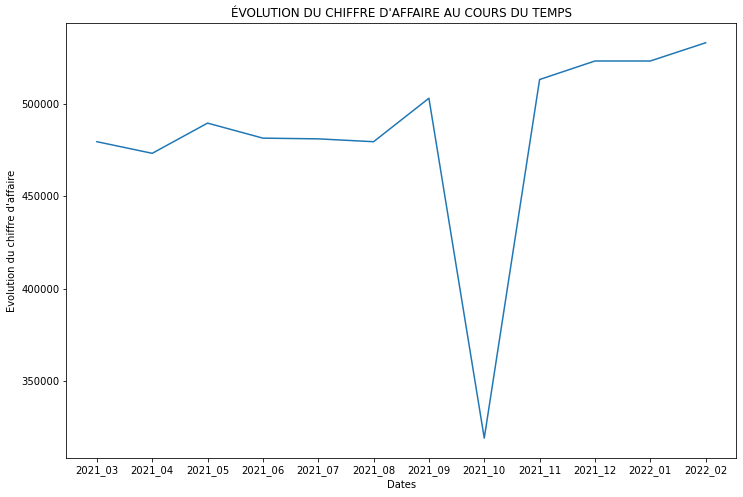

In [57]:
x = analyse_transaction_by_YearMonth["YearMonth"]
y = analyse_transaction_by_YearMonth["price"]
plt.figure(figsize = (12,8))
ax = plt.axes()
ax = ax.set(xlabel = "Dates", ylabel = "Evolution du chiffre d'affaire")
plt.title("ÉVOLUTION DU CHIFFRE D'AFFAIRE AU COURS DU TEMPS")
plt.plot(x, y)
plt.savefig("ÉVOLUTION DU CHIFFRE D'AFFAIRE AU COURS DU TEMPS.png")
plt.show()

In [58]:
analyse_transaction_by_Client_id = analyse_transaction.groupby(by = ["client_id", ]).agg({"price": "sum"})
analyse_transaction_by_Client_id = analyse_transaction_by_Client_id.reset_index()
analyse_transaction_by_Client_id.head()

,client_id,price
0,c_1,300.65
1,c_10,586.18
2,c_100,222.87
3,c_1000,980.02
4,c_1001,1102.45


In [59]:
analyse_transaction_by_ascending_price = analyse_transaction_by_Client_id.sort_values(by =["price"], ascending = False)
analyse_transaction_by_ascending_price.head(10)

,client_id,price
677,c_1609,162007.340000
4388,c_4958,144257.210000
6337,c_6714,73218.633656
2724,c_3454,54464.213656
7715,c_7959,2564.250000
7791,c_8026,2548.316828
3870,c_4491,2540.530000
1268,c_2140,2527.010000
8195,c_8392,2515.980000
7120,c_7421,2511.980000


In [60]:
clients_forte_valeur_achat = analyse_transaction_by_ascending_price.head(4)
clients_forte_valeur_achat

,client_id,price
677,c_1609,162007.340000
4388,c_4958,144257.210000
6337,c_6714,73218.633656
2724,c_3454,54464.213656


In [61]:
analyse_transaction["is_best_4_client"] = (analyse_transaction["client_id"].isin(clients_forte_valeur_achat.client_id))
analyse_transaction.head()

,id_prod,date,session_id,client_id,date_time,YearMonthDay,YearMonth,Year,Month,Day,price,categ,sex,birth,age,is_best_4_client
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,2021-04-10 18:37:28.723910,2021_04_10,2021_04,2021,4,10,4.99,0.0,f,1977,45,False
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,2022-02-03 01:55:53.276402,2022_02_03,2022_02,2022,2,3,65.75,2.0,f,2000,22,False
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,2021-09-23 15:13:46.938559,2021_09_23,2021_09,2021,9,23,10.71,1.0,f,1979,43,False
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,2021-10-17 03:27:18.783634,2021_10_17,2021_10,2021,10,17,4.20,0.0,m,1963,59,False
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,2021-07-17 20:34:25.800563,2021_07_17,2021_07,2021,7,17,8.99,0.0,f,1980,42,False


In [62]:
analyse_transaction.is_best_4_client.unique()

array([False,  True])

In [63]:
transaction_client_ordinaire = analyse_transaction[analyse_transaction.is_best_4_client == False]
transaction_client_ordinaire.head()

,id_prod,date,session_id,client_id,date_time,YearMonthDay,YearMonth,Year,Month,Day,price,categ,sex,birth,age,is_best_4_client
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,2021-04-10 18:37:28.723910,2021_04_10,2021_04,2021,4,10,4.99,0.0,f,1977,45,False
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,2022-02-03 01:55:53.276402,2022_02_03,2022_02,2022,2,3,65.75,2.0,f,2000,22,False
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,2021-09-23 15:13:46.938559,2021_09_23,2021_09,2021,9,23,10.71,1.0,f,1979,43,False
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,2021-10-17 03:27:18.783634,2021_10_17,2021_10,2021,10,17,4.20,0.0,m,1963,59,False
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,2021-07-17 20:34:25.800563,2021_07_17,2021_07,2021,7,17,8.99,0.0,f,1980,42,False


In [64]:
transaction_client_ordinaire.is_best_4_client.unique()

array([False])

In [65]:
transaction_client_ordinaire_curve = transaction_client_ordinaire.groupby(by = ["YearMonth", "categ",]).agg({"price":"sum"})
transaction_client_ordinaire_curve = transaction_client_ordinaire_curve.reset_index()
transaction_client_ordinaire_curve.head()

,YearMonth,categ,price
0,2021_03,0.0,180673.971454
1,2021_03,1.0,174569.680000
2,2021_03,2.0,87791.280000
3,2021_04,0.0,191512.505111
4,2021_04,1.0,145272.820000


In [66]:
transaction_client_ordinaire_curve.sort_values(by = "YearMonth")

,YearMonth,categ,price
0,2021_03,0.0,180673.971454
1,2021_03,1.0,174569.680000
2,2021_03,2.0,87791.280000
3,2021_04,0.0,191512.505111
4,2021_04,1.0,145272.820000
5,2021_04,2.0,99541.060000
6,2021_05,0.0,182363.924626
7,2021_05,1.0,155309.630000
8,2021_05,2.0,113723.560000
9,2021_06,0.0,156640.760969


In [67]:
transaction_client_ordinaire_curve_pivot = transaction_client_ordinaire_curve.pivot_table( values="price", index=["YearMonth"], columns="categ", aggfunc=np.sum)
transaction_client_ordinaire_curve_pivot = transaction_client_ordinaire_curve_pivot.reset_index()
transaction_client_ordinaire_curve_pivot

categ,YearMonth,0.0,1.0,2.0
0,2021_03,180673.971454,174569.68,87791.28
1,2021_04,191512.505111,145272.82,99541.06
2,2021_05,182363.924626,155309.63,113723.56
3,2021_06,156640.760969,177840.33,110450.26
4,2021_07,135459.987313,176647.61,133591.40
5,2021_08,156918.281454,152886.83,133462.39
6,2021_09,229212.171939,177809.68,59856.27
7,2021_10,184850.477798,31892.01,78570.59
8,2021_11,144729.778282,235970.11,94519.06
9,2021_12,191471.867798,234369.37,58977.09


In [68]:
#df.head()

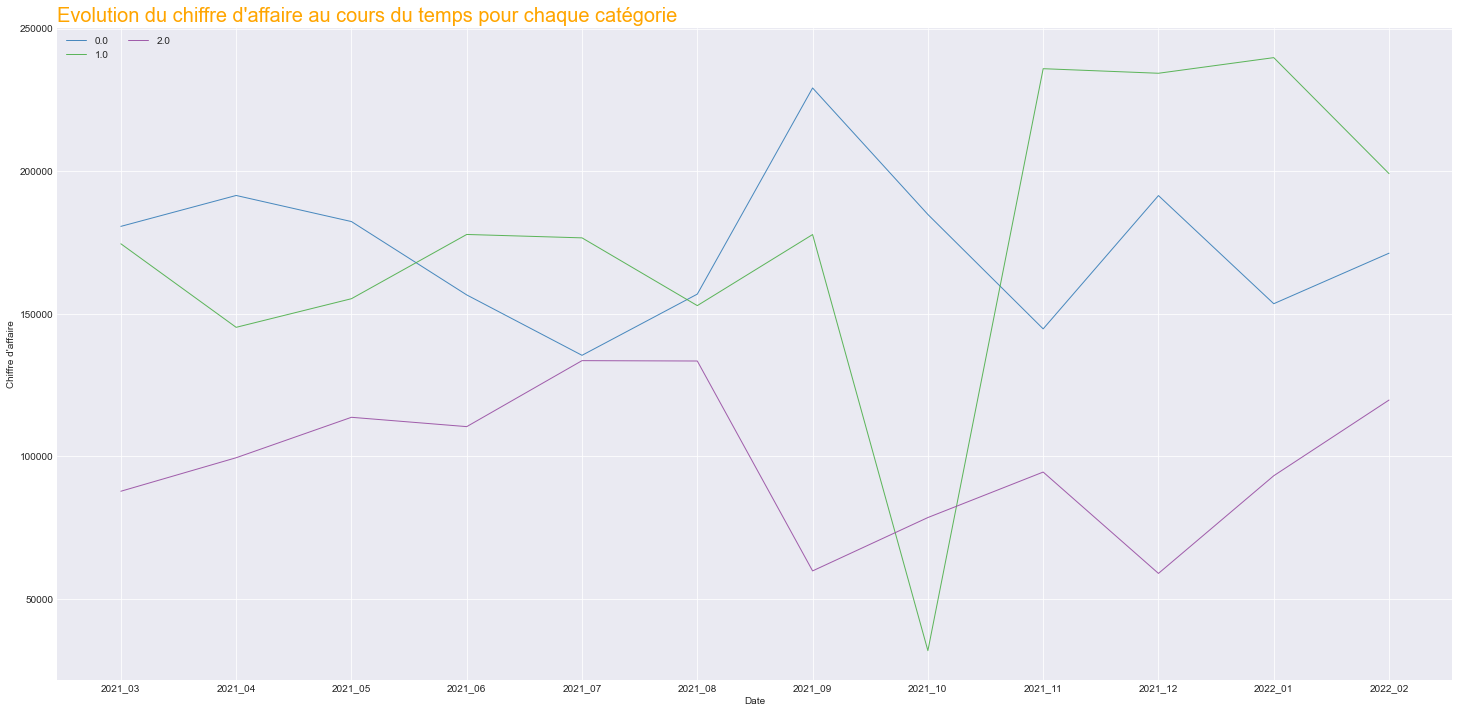

In [69]:
# Make a data frame
#df=pd.DataFrame({'x': range(1,11), 'y1': np.random.randn(10), 'y2': np.random.randn(10)+range(1,11), 'y3': np.random.randn(10)+range(11,21), 'y4': np.random.randn(10)+range(6,16), 'y5': np.random.randn(10)+range(4,14)+(0,0,0,0,0,0,0,-3,-8,-6), 'y6': np.random.randn(10)+range(2,12), 'y7': np.random.randn(10)+range(5,15), 'y8': np.random.randn(10)+range(4,14), 'y9': np.random.randn(10)+range(4,14), 'y10': np.random.randn(10)+range(2,12) })

plt.figure(figsize = (25, 12))
# Change the style of plot
plt.style.use('seaborn-darkgrid')
 
# Create a color palette
palette = plt.get_cmap('Set1')
 
# Plot multiple lines
num=0
for column in transaction_client_ordinaire_curve_pivot.drop('YearMonth', axis=1):
    num+=1
    plt.plot(transaction_client_ordinaire_curve_pivot['YearMonth'], transaction_client_ordinaire_curve_pivot[column], marker='', color=palette(num), linewidth=1, alpha=0.9, label=column)

# Add legend
plt.legend(loc=2, ncol=2)
 
# Add titles
plt.title("Evolution du chiffre d'affaire au cours du temps pour chaque catégorie ", loc='left', fontsize=20, fontweight=0, color='orange')
plt.xlabel("Date")
plt.ylabel("Chiffre d'affaire")
plt.plot(fontsize = 25)
plt.savefig("ÉVOLUTION DU CHIFFRE D'AFFAIRE AU COURS DU TEMPS par categ.png")
# Show the graph
plt.show() 

In [70]:
transaction_client_ordinaire["is_client_octobre"] = transaction_client_ordinaire["Month"] == 10
transaction_client_ordinaire.head()

<ipython-input-70-6665fa6cc825>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transaction_client_ordinaire["is_client_octobre"] = transaction_client_ordinaire["Month"] == 10


,id_prod,date,session_id,client_id,date_time,YearMonthDay,YearMonth,Year,Month,Day,price,categ,sex,birth,age,is_best_4_client,is_client_octobre
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,2021-04-10 18:37:28.723910,2021_04_10,2021_04,2021,4,10,4.99,0.0,f,1977,45,False,False
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,2022-02-03 01:55:53.276402,2022_02_03,2022_02,2022,2,3,65.75,2.0,f,2000,22,False,False
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,2021-09-23 15:13:46.938559,2021_09_23,2021_09,2021,9,23,10.71,1.0,f,1979,43,False,False
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,2021-10-17 03:27:18.783634,2021_10_17,2021_10,2021,10,17,4.20,0.0,m,1963,59,False,True
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,2021-07-17 20:34:25.800563,2021_07_17,2021_07,2021,7,17,8.99,0.0,f,1980,42,False,False


In [71]:
analyse_transaction_octobre = transaction_client_ordinaire[transaction_client_ordinaire.is_client_octobre == True]
analyse_transaction_octobre.head()

,id_prod,date,session_id,client_id,date_time,YearMonthDay,YearMonth,Year,Month,Day,price,categ,sex,birth,age,is_best_4_client,is_client_octobre
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,2021-10-17 03:27:18.783634,2021_10_17,2021_10,2021,10,17,4.20,0.0,m,1963,59,False,True
10,0_423,2021-10-09 23:50:33.907269,s_102501,c_2225,2021-10-09 23:50:33.907269,2021_10_09,2021_10,2021,10,9,1.99,0.0,f,1949,73,False,True
12,0_1368,2021-10-02 10:50:43.188179,s_98886,c_857,2021-10-02 10:50:43.188179,2021_10_02,2021_10,2021,10,2,5.13,0.0,m,1985,37,False,True
14,0_1207,2021-10-12 23:22:51.290635,s_103927,c_648,2021-10-12 23:22:51.290635,2021_10_12,2021_10,2021,10,12,16.99,0.0,m,1976,46,False,True
17,0_1452,2021-10-15 10:07:12.401758,s_105078,c_6297,2021-10-15 10:07:12.401758,2021_10_15,2021_10,2021,10,15,13.77,0.0,f,1969,53,False,True


In [72]:
analyse_transaction_octobre.categ.unique()

array([0., 2., 1.])

In [73]:
client_octobre_by_Day = analyse_transaction_octobre.pivot_table(index="Day",columns="categ", values="price", aggfunc=np.sum)
client_octobre_by_Day = client_octobre_by_Day.reset_index()
client_octobre_by_Day

categ,Day,0.0,1.0,2.0
0,1,6258.120000,6530.99,2752.09
1,2,6450.520000,NaN,1781.00
2,3,6231.860000,NaN,1827.13
3,4,6187.613656,NaN,2217.94
4,5,6181.620000,NaN,2920.56
5,6,7014.930000,NaN,1660.50
6,7,5932.980000,NaN,1715.08
7,8,6552.440000,NaN,2946.05
8,9,6080.920000,NaN,2268.30
9,10,5911.370000,NaN,2053.54


Ici on remarque une perte de donnée entre 02 et le 27 octobre pour la catégorie 1

In [74]:
client_octobre_by_Day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Day     31 non-null     int64  
 1   0.0     31 non-null     float64
 2   1.0     5 non-null      float64
 3   2.0     31 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 1.0 KB


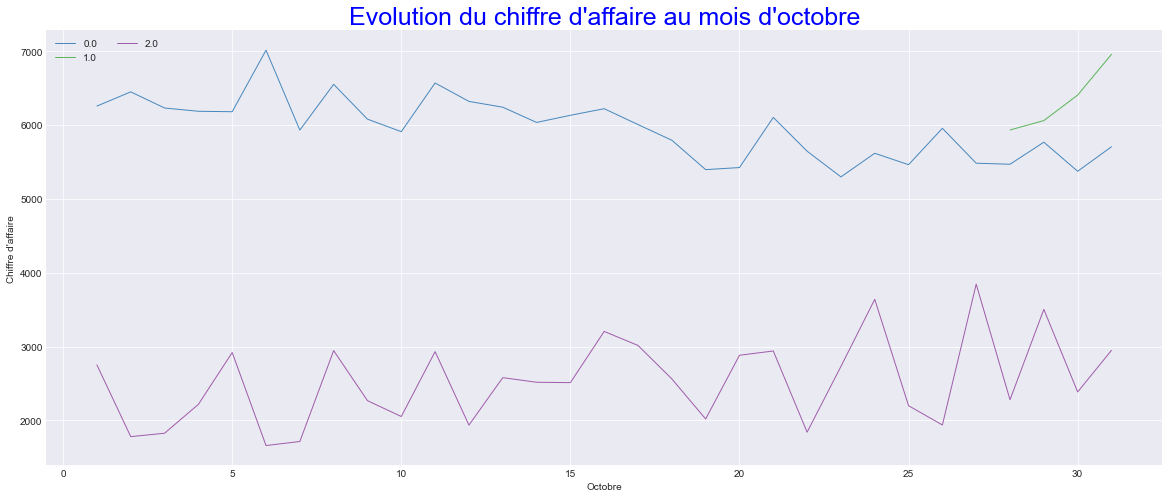

In [75]:
plt.figure(figsize = (20, 8))
# Change the style of plot
plt.style.use('seaborn-darkgrid')
 
# Create a color palette
palette = plt.get_cmap('Set1')
 
# Plot multiple lines
num=0
for column in client_octobre_by_Day.drop('Day', axis=1):
    num+=1
    plt.plot(client_octobre_by_Day['Day'], client_octobre_by_Day[column], marker='', color=palette(num), linewidth=1, alpha=0.9, label=column)

# Add legend
plt.legend(loc=2, ncol=2)
 
# Add titles
plt.title("Evolution du chiffre d'affaire au mois d'octobre", loc='center', fontsize=25, fontweight=0, color='blue')
plt.xlabel("Octobre")
plt.ylabel("Chiffre d'affaire")
plt.plot(fontsize = 30)
plt.savefig("Evolution du chiffre d'affaire au mois d'octobre")
# Show the graph
plt.show()

In [76]:
analyse_transaction_sans_octobre = transaction_client_ordinaire[transaction_client_ordinaire.is_client_octobre == False]
analyse_transaction_sans_octobre.head()

,id_prod,date,session_id,client_id,date_time,YearMonthDay,YearMonth,Year,Month,Day,price,categ,sex,birth,age,is_best_4_client,is_client_octobre
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,2021-04-10 18:37:28.723910,2021_04_10,2021_04,2021,4,10,4.99,0.0,f,1977,45,False,False
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,2022-02-03 01:55:53.276402,2022_02_03,2022_02,2022,2,3,65.75,2.0,f,2000,22,False,False
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,2021-09-23 15:13:46.938559,2021_09_23,2021_09,2021,9,23,10.71,1.0,f,1979,43,False,False
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,2021-07-17 20:34:25.800563,2021_07_17,2021_07,2021,7,17,8.99,0.0,f,1980,42,False,False
5,0_1085,2021-09-15 05:47:48.215162,s_90139,c_2526,2021-09-15 05:47:48.215162,2021_09_15,2021_09,2021,9,15,3.99,0.0,f,1982,40,False,False


In [77]:
analyse_transaction_sans_octobre.is_client_octobre.unique()

array([False])

In [78]:
analyse_transaction_sans_octobre_pivot = analyse_transaction_sans_octobre.pivot_table(index = ["YearMonthDay"], columns = "categ", values = "price", aggfunc = np.sum)
analyse_transaction_sans_octobre_pivot = analyse_transaction_sans_octobre_pivot.reset_index()
analyse_transaction_sans_octobre_pivot

categ,YearMonthDay,0.0,1.0,2.0
0,2021_03_01,5943.376828,6375.49,3011.45
1,2021_03_02,6171.936828,5253.16,2995.04
2,2021_03_03,5722.510000,5217.22,2662.30
3,2021_03_04,5434.760000,5614.73,2369.15
4,2021_03_05,5500.920000,6522.55,3894.66
...,...,...,...,...
329,2022_02_24,6669.766828,6304.71,5894.11
330,2022_02_25,5984.043656,5919.94,5024.05
331,2022_02_26,6673.290000,6925.03,5088.80
332,2022_02_27,6991.140000,6196.39,4639.56


In [79]:
moyenne = analyse_transaction_sans_octobre_pivot.describe()
moyenne 

categ,0.0,1.0,2.0
count,334.000000,334.000000,334.000000
mean,5670.085534,6196.686617,3308.119820
std,983.855150,1203.632377,1003.160354
min,3706.570000,4029.820000,901.170000
25%,4980.587621,5246.690000,2662.325000
50%,5579.865242,5893.220000,3258.415000
75%,6204.592500,7306.085000,4020.412500
max,9380.010000,9798.280000,5998.300000


In [80]:
client_octobre_by_Day_reconstruit = client_octobre_by_Day.fillna(6196.7)
client_octobre_by_Day_reconstruit

categ,Day,0.0,1.0,2.0
0,1,6258.120000,6530.99,2752.09
1,2,6450.520000,6196.70,1781.00
2,3,6231.860000,6196.70,1827.13
3,4,6187.613656,6196.70,2217.94
4,5,6181.620000,6196.70,2920.56
5,6,7014.930000,6196.70,1660.50
6,7,5932.980000,6196.70,1715.08
7,8,6552.440000,6196.70,2946.05
8,9,6080.920000,6196.70,2268.30
9,10,5911.370000,6196.70,2053.54


In [81]:
#Calcul de la moyenne des prix au mois d'octobre 
moyenne_octobre = client_octobre_by_Day_reconstruit[1.0].sum()
moyenne_octobre

193006.2099999999

In [82]:
# Nous allons injecter cette moyenne dans le mois d'octobre 
transaction_client_ordinaire_pivot = transaction_client_ordinaire.pivot_table(index = "Month", columns = "categ", values = "price", aggfunc = np.sum)
transaction_client_ordinaire_pivot = transaction_client_ordinaire_pivot.reset_index()
transaction_client_ordinaire_pivot

categ,Month,0.0,1.0,2.0
0,1,153554.834141,239849.07,93224.71
1,2,171270.485111,199168.20,119774.94
2,3,180673.971454,174569.68,87791.28
3,4,191512.505111,145272.82,99541.06
4,5,182363.924626,155309.63,113723.56
5,6,156640.760969,177840.33,110450.26
6,7,135459.987313,176647.61,133591.40
7,8,156918.281454,152886.83,133462.39
8,9,229212.171939,177809.68,59856.27
9,10,184850.477798,31892.01,78570.59


In [83]:
transaction_client_ordinaire_pivot.columns = ["Month","categ_0", "categ_1", "categ_2"]
transaction_client_ordinaire_pivot

,Month,categ_0,categ_1,categ_2
0,1,153554.834141,239849.07,93224.71
1,2,171270.485111,199168.20,119774.94
2,3,180673.971454,174569.68,87791.28
3,4,191512.505111,145272.82,99541.06
4,5,182363.924626,155309.63,113723.56
5,6,156640.760969,177840.33,110450.26
6,7,135459.987313,176647.61,133591.40
7,8,156918.281454,152886.83,133462.39
8,9,229212.171939,177809.68,59856.27
9,10,184850.477798,31892.01,78570.59


In [84]:
transaction_client_ordinaire_pivot.iloc[9,2::3] = 193006.2
transaction_client_ordinaire_pivot

,Month,categ_0,categ_1,categ_2
0,1,153554.834141,239849.07,93224.71
1,2,171270.485111,199168.20,119774.94
2,3,180673.971454,174569.68,87791.28
3,4,191512.505111,145272.82,99541.06
4,5,182363.924626,155309.63,113723.56
5,6,156640.760969,177840.33,110450.26
6,7,135459.987313,176647.61,133591.40
7,8,156918.281454,152886.83,133462.39
8,9,229212.171939,177809.68,59856.27
9,10,184850.477798,193006.20,78570.59


#     ***INDICATEURS DE TENDANCE CENTRALE ET DE DISPERSION

 ### Calcul de la moyenne, la médiane et le mode des Clients par catégories

In [85]:
transaction_client_ordinaire_group = analyse_transaction_sans_octobre.groupby(by =["YearMonth", "categ"]).agg({"price": "sum"}) 
transaction_client_ordinaire_group = transaction_client_ordinaire_group.reset_index()
transaction_client_ordinaire_group

,YearMonth,categ,price
0,2021_03,0.0,180673.971454
1,2021_03,1.0,174569.680000
2,2021_03,2.0,87791.280000
3,2021_04,0.0,191512.505111
4,2021_04,1.0,145272.820000
5,2021_04,2.0,99541.060000
6,2021_05,0.0,182363.924626
7,2021_05,1.0,155309.630000
8,2021_05,2.0,113723.560000
9,2021_06,0.0,156640.760969


### Calcul de la moyenne, la médiane et le mode par catégorie 

In [86]:
for cat in transaction_client_ordinaire_group["categ"].unique():
    subset = transaction_client_ordinaire_group[transaction_client_ordinaire_group.categ == cat] # création d'un sous échantillone
    print("_"*20) # on met 20 fois le tiret pour séparer chaque valeur
    print("Catégorie:\n" , cat) # on affiche les catégories de transaction_client_non_professionnel
    print("Moyenne:\n", round(subset["price"].mean()))
    print("Médiane:\n", round(subset["price"].median()))
    print("Mode;\n", round(subset["price"].mode()))

____________________
Catégorie:
 0.0
Moyenne:
 172164
Médiane:
 171270
Mode;
 0     135460.0
1     144730.0
2     153555.0
3     156641.0
4     156918.0
5     171270.0
6     180674.0
7     182364.0
8     191472.0
9     191513.0
10    229212.0
dtype: float64
____________________
Catégorie:
 1.0
Moyenne:
 188154
Médiane:
 177810
Mode;
 0     145273.0
1     152887.0
2     155310.0
3     174570.0
4     176648.0
5     177810.0
6     177840.0
7     199168.0
8     234369.0
9     235970.0
10    239849.0
dtype: float64
____________________
Catégorie:
 2.0
Moyenne:
 100447
Médiane:
 99541
Mode;
 0      58977.0
1      59856.0
2      87791.0
3      93225.0
4      94519.0
5      99541.0
6     110450.0
7     113724.0
8     119775.0
9     133462.0
10    133591.0
dtype: float64


# ***ANALYSE DE CONCENTRATION VIA UNE COURBE DE LORENZ


In [87]:
analyse_transaction_sans_octobre_lorenz_id_prod= analyse_transaction_sans_octobre.groupby(by ="id_prod" ).agg({"price": sum})
analyse_transaction_sans_octobre_lorenz_id_prod = analyse_transaction_sans_octobre_lorenz_id_prod.reset_index()
analyse_transaction_sans_octobre_lorenz_id_prod

,id_prod,price
0,0_0,1950.00
1,0_1,2406.81
2,0_10,125.65
3,0_100,41.20
4,0_1000,1238.04
...,...,...
3252,2_95,296.97
3253,2_96,11546.31
3254,2_97,643.96
3255,2_98,149.74


<ipython-input-88-4e699685b22c>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


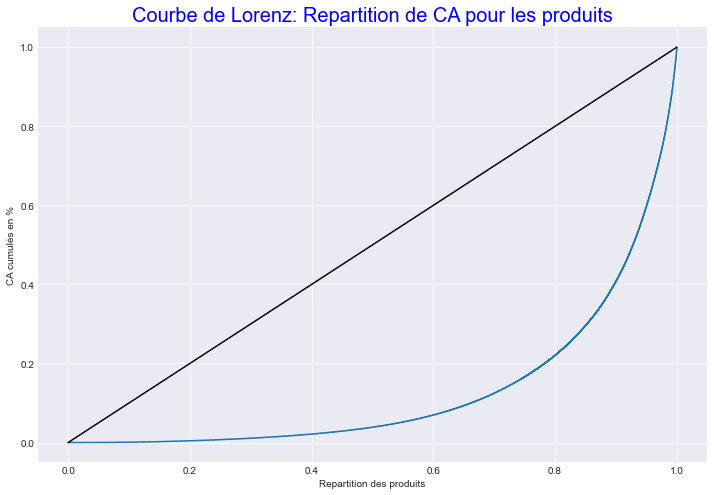

In [88]:
prix_achat = analyse_transaction_sans_octobre_lorenz_id_prod[analyse_transaction_sans_octobre_lorenz_id_prod['price'] > 0] # sous échantillon = prix_achat
prix = prix_achat['price'].values
lorenz_id_prod = np.cumsum(np.sort(prix)) / prix.sum() # on tri par ordre croissant 
lorenz_id_prod = np.append([0],lorenz_id_prod) # La courbe de Lorenz commence à 0
plt.figure(figsize = (12, 8))
plt.plot(np.linspace(0,1,len(lorenz_id_prod)),lorenz_id_prod,drawstyle='steps-post')

ax = plt.axes()
plt.title("Courbe de Lorenz: Repartition de CA pour les produits", fontsize = 20, color = "blue")
## line plot of equality
ax.plot([0,1], [0,1], color='k')
ax = ax.set(xlabel='Repartition des produits', ylabel='CA cumulés en %')
plt.rcParams.update({'font.size': 15})
plt.show()

## Indice de Gini

In [89]:
air_sous_courbe= lorenz_id_prod[:-1].sum()/len(lorenz_id_prod)
s = 0.5 - air_sous_courbe
gini = 2 * s
gini

0.7403660548426614

In [90]:
analyse_transaction_sans_octobre_lorenz_client_id= analyse_transaction_sans_octobre.groupby(by ="client_id" ).agg({"price": sum})
analyse_transaction_sans_octobre_lorenz_client_id = analyse_transaction_sans_octobre_lorenz_client_id.reset_index()
analyse_transaction_sans_octobre_lorenz_client_id

,client_id,price
0,c_1,292.66
1,c_10,586.18
2,c_100,222.87
3,c_1000,928.05
4,c_1001,1009.67
...,...,...
8589,c_995,119.08
8590,c_996,725.61
8591,c_997,514.90
8592,c_998,1527.69


<ipython-input-91-1969d562d37b>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


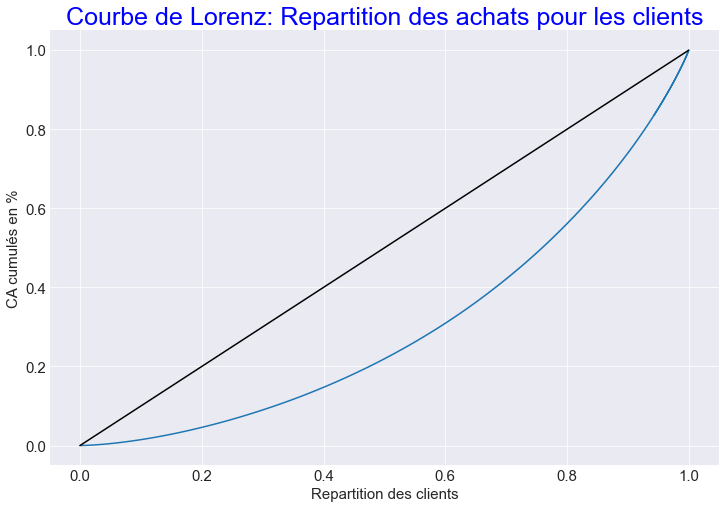

<Figure size 432x288 with 0 Axes>

In [91]:
prix_achat = analyse_transaction_sans_octobre_lorenz_client_id[analyse_transaction_sans_octobre_lorenz_client_id['price'] > 0] # sous échantillon = prix_achat
prix = prix_achat['price'].values
lorenz = np.cumsum(np.sort(prix)) / prix.sum() # on tri par ordre croissant 
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0
plt.figure(figsize = (12, 8))
plt.plot(np.linspace(0,1,len(lorenz)),lorenz,drawstyle='steps-post')

ax = plt.axes()
plt.title("Courbe de Lorenz: Repartition des achats pour les clients", fontsize = 25, color = "blue") 
## line plot of equality
ax.plot([0,1], [0,1], color='k')
ax = ax.set(xlabel='Repartition des clients', ylabel='CA cumulés en %')
plt.rcParams.update({'font.size':15})
plt.show()
plt.savefig("Courbe de lorenz: Repartion des achats pour les clients.png")

In [92]:
air_sous_courbe= lorenz[:-1].sum()/len(lorenz)
s = 0.5 - air_sous_courbe
gini = 2 * s
gini

0.3960481630386212

# ***REPRÉSENTATIONS GRAPHIQUES

### 1. HISTOGRAMME 

### Représentation du chiffre d'affaire par mois 


In [93]:
analyse_transaction_sans_octobre_histo= analyse_transaction_sans_octobre.groupby(by ="YearMonth" ).agg({"price": sum})
analyse_transaction_sans_octobre_histo = analyse_transaction_sans_octobre_histo.reset_index()
analyse_transaction_sans_octobre_histo

,YearMonth,price
0,2021_03,443034.931454
1,2021_04,436326.385111
2,2021_05,451397.114626
3,2021_06,444931.350969
4,2021_07,445698.997313
5,2021_08,443267.501454
6,2021_09,466878.121939
7,2021_11,475218.948282
8,2021_12,484818.327798
9,2022_01,486628.614141


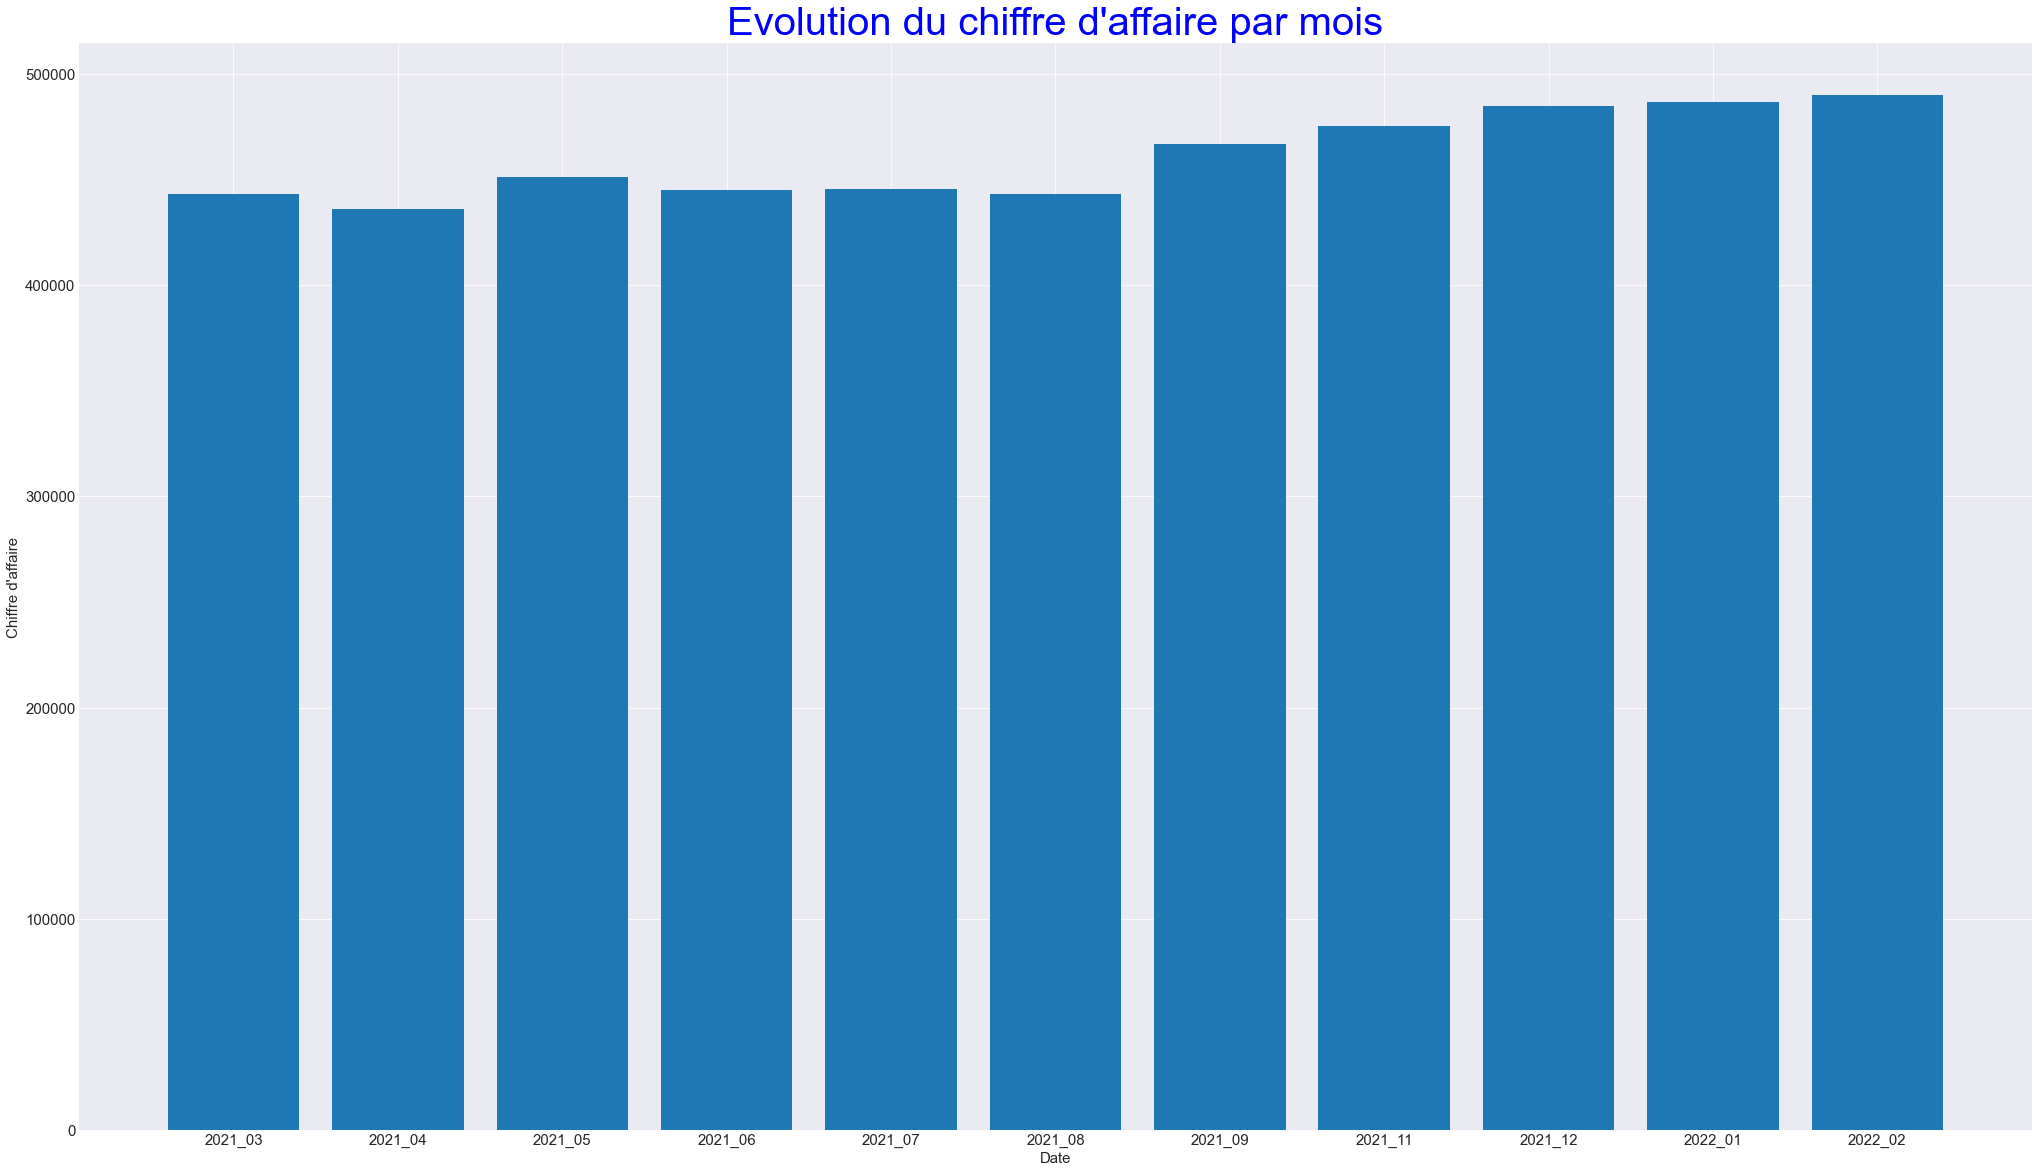

In [94]:
x = analyse_transaction_sans_octobre_histo["YearMonth"]
y= analyse_transaction_sans_octobre_histo["price"]
plt.figure(figsize = (35,20))
plt.bar(x,y,align='center') # A bar chart
plt.xlabel('Date')
plt.ylabel("Chiffre d'affaire")
plt.title("Evolution du chiffre d'affaire par mois", fontsize =40, color = "blue")
plt.savefig("Evolution du chiffre d'affaire par mois")
plt.show()

### 2. REPRÉSENTATION AVEC DES BOÎTES À MOUSTACHES

In [95]:
analyse_transaction_sans_octobre_categ_price = analyse_transaction_sans_octobre.groupby(by = ["YearMonth","categ"]).agg({"price": "sum"})
analyse_transaction_sans_octobre_categ_price = analyse_transaction_sans_octobre_categ_price.reset_index()
analyse_transaction_sans_octobre_categ_price

,YearMonth,categ,price
0,2021_03,0.0,180673.971454
1,2021_03,1.0,174569.680000
2,2021_03,2.0,87791.280000
3,2021_04,0.0,191512.505111
4,2021_04,1.0,145272.820000
5,2021_04,2.0,99541.060000
6,2021_05,0.0,182363.924626
7,2021_05,1.0,155309.630000
8,2021_05,2.0,113723.560000
9,2021_06,0.0,156640.760969


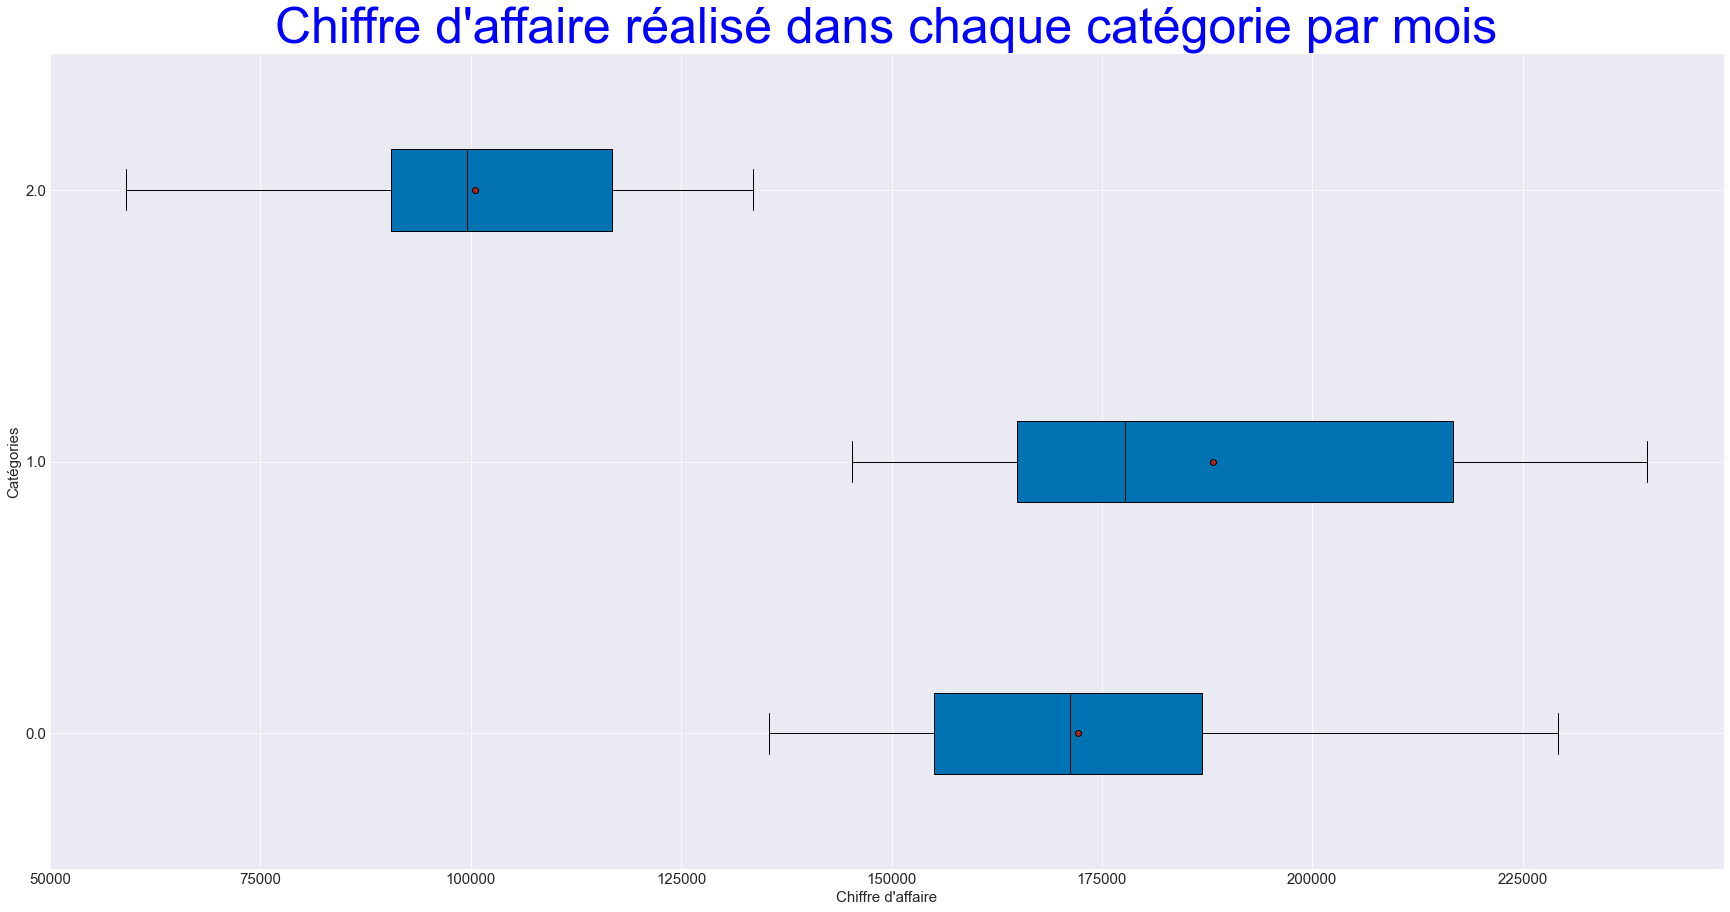

In [96]:
x = "categ"   # variable qualitative
y = "price"   # variable quantitative
sous_echantillon = analyse_transaction_sans_octobre_categ_price[analyse_transaction_sans_octobre_categ_price["price"]> 0]
sns.set_palette(sns.color_palette("colorblind",3)) # changement de la palette graphique
modalite = sous_echantillon[x].unique()
groupe = []
fig = plt.figure(figsize=(30,15))
ax = plt.axes()
plt.title("Chiffre d'affaire réalisé dans chaque catégorie par mois", fontsize = 50, color ="blue") 

ax = ax.set(xlabel="Chiffre d'affaire", ylabel='Catégories')

for m in modalite:
    groupe.append(sous_echantillon[sous_echantillon[x] == m][y])
medianprops = {"color": "black"}
meanprops = {"marker": "o", "markeredgecolor": "black", "markerfacecolor": "firebrick"}
plt.boxplot(groupe, labels = modalite, showfliers = False, medianprops = medianprops, 
           vert = False, patch_artist = True, showmeans = True, meanprops = meanprops)
plt.savefig("CA par categ")
plt.show()

# 3. CAMEMBERT

### Répartition du chiffre d'affaire par catégorie 

In [97]:
analyse_transaction_sans_octobre_categ_price_pie = analyse_transaction_sans_octobre.groupby(by = ["categ"]).agg({"price": "sum"})
analyse_transaction_sans_octobre_categ_price_pie = analyse_transaction_sans_octobre_categ_price_pie.reset_index()
analyse_transaction_sans_octobre_categ_price_pie

,categ,price
0,0.0,1.893809e+06
1,1.0,2.069693e+06
2,2.0,1.104912e+06


<Figure size 864x576 with 0 Axes>

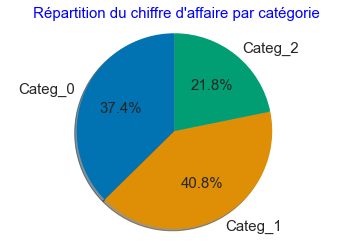

In [98]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
plt.figure(figsize =( 12,8))
labels = "Categ_0", "Categ_1", "Categ_2"
sizes = [1.893809e+06, 2.069693e+06, 1.104912e+06]
fig1, ax1 = plt.subplots()
plt.fontsize = 1
ax1.pie(sizes,labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title(" Répartition du chiffre d'affaire par catégorie", fontsize = 15, color = "blue")
plt.savefig("répartition du CA par catg.png")
plt.show()


### 4. REPRÉSENTATION DE SÉRIE TEMPORELLE

In [99]:
analyse_transaction_sans_octobre_categ_price_pivot = analyse_transaction_sans_octobre_categ_price.pivot_table(index = "YearMonth", columns = "categ", values = "price")
analyse_transaction_sans_octobre_categ_price_pivot = analyse_transaction_sans_octobre_categ_price_pivot.reset_index()
analyse_transaction_sans_octobre_categ_price_pivot

categ,YearMonth,0.0,1.0,2.0
0,2021_03,180673.971454,174569.68,87791.28
1,2021_04,191512.505111,145272.82,99541.06
2,2021_05,182363.924626,155309.63,113723.56
3,2021_06,156640.760969,177840.33,110450.26
4,2021_07,135459.987313,176647.61,133591.40
5,2021_08,156918.281454,152886.83,133462.39
6,2021_09,229212.171939,177809.68,59856.27
7,2021_11,144729.778282,235970.11,94519.06
8,2021_12,191471.867798,234369.37,58977.09
9,2022_01,153554.834141,239849.07,93224.71


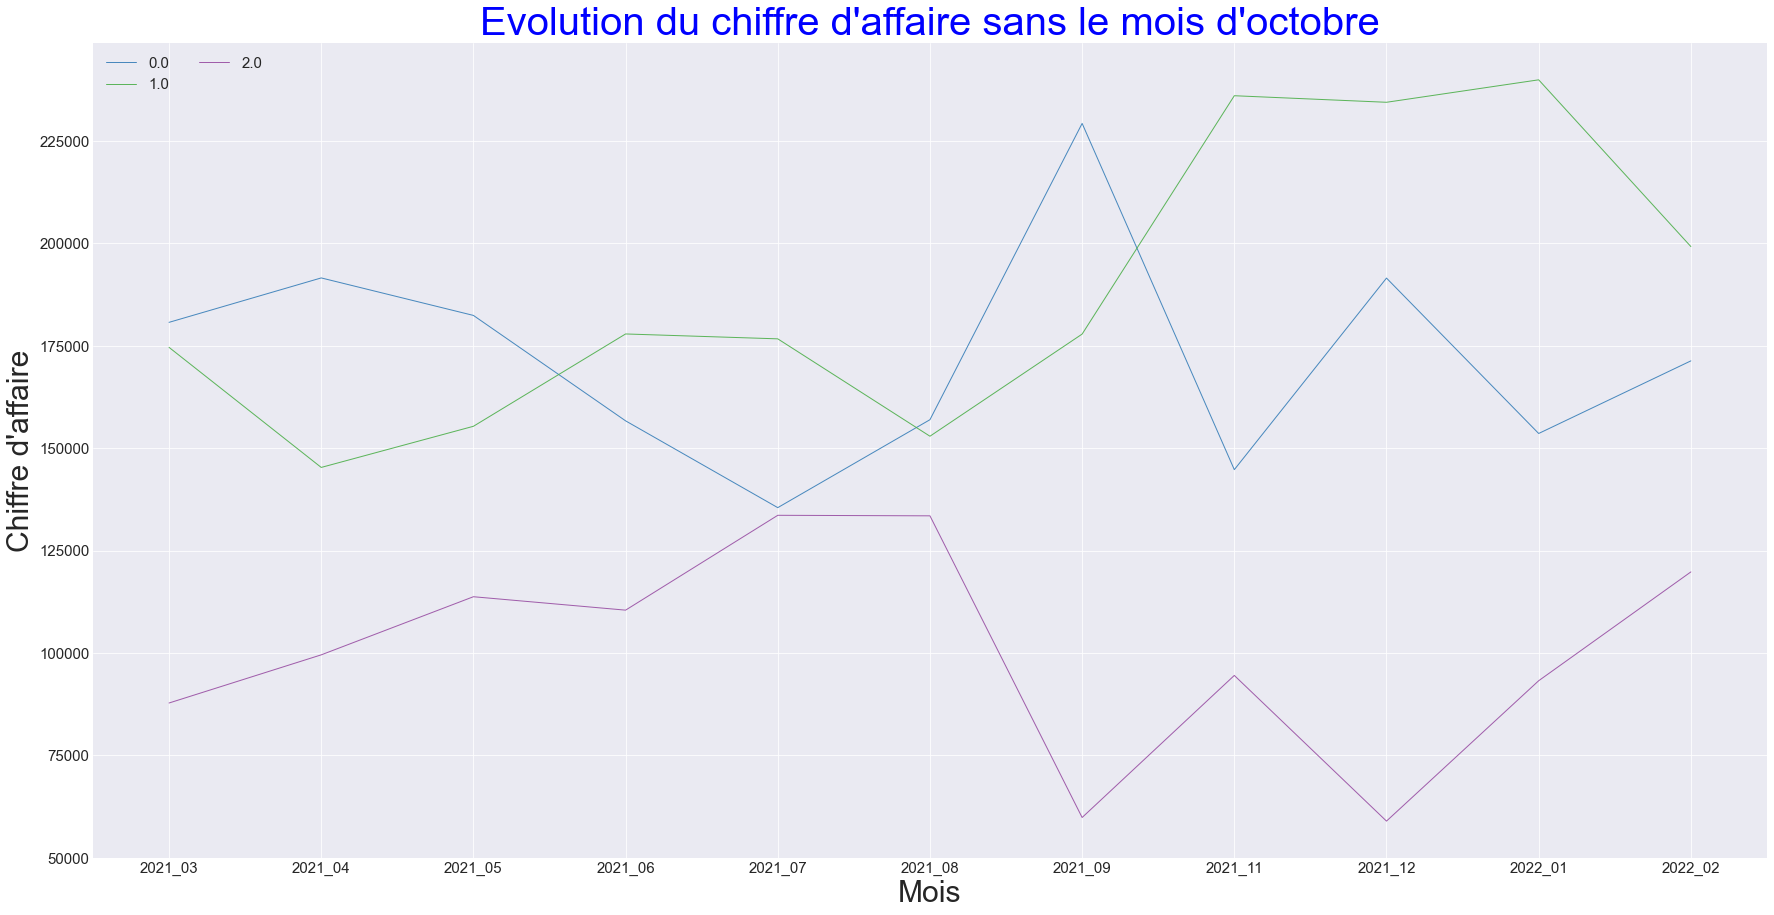

In [100]:
plt.figure(figsize = (30, 15))
# Change the style of plot
plt.style.use('seaborn-darkgrid')
 
# Create a color palette
palette = plt.get_cmap('Set1')
 
# Plot multiple lines
num=0
for column in analyse_transaction_sans_octobre_categ_price_pivot.drop('YearMonth', axis=1):
    num+=1
    plt.plot(analyse_transaction_sans_octobre_categ_price_pivot['YearMonth'], analyse_transaction_sans_octobre_categ_price_pivot[column], marker='', color=palette(num), linewidth=1, alpha=0.9, label=column)

# Add legend
plt.legend(loc=2, ncol=2)
 
# Add titles
plt.title("Evolution du chiffre d'affaire sans le mois d'octobre", loc='center', fontsize=40, fontweight=0, color='blue')
plt.xlabel("Mois", fontsize = 30)
plt.ylabel("Chiffre d'affaire", fontsize = 30)
plt.plot(fontsize = 15)
plt.savefig("chiffre d'affaire sans octobre")
# Show the graph
plt.show()

# ***Analyses bivariées

### 1 - Analyse bivariée entre le sexe des clients et le montant dépensé

In [101]:
transaction_client_sex = analyse_transaction_sans_octobre.groupby(by = ["sex", "YearMonth"]).agg({"price": "sum"})
transaction_client_sex = transaction_client_sex.reset_index()
transaction_client_sex

,sex,YearMonth,price
0,f,2021_03,228877.674141
1,f,2021_04,229415.617798
2,f,2021_05,237872.557798
3,f,2021_06,229384.010485
4,f,2021_07,229676.073656
5,f,2021_08,230349.567313
6,f,2021_09,239704.834626
7,f,2021_11,247916.517313
8,f,2021_12,251943.667313
9,f,2022_01,256915.660485


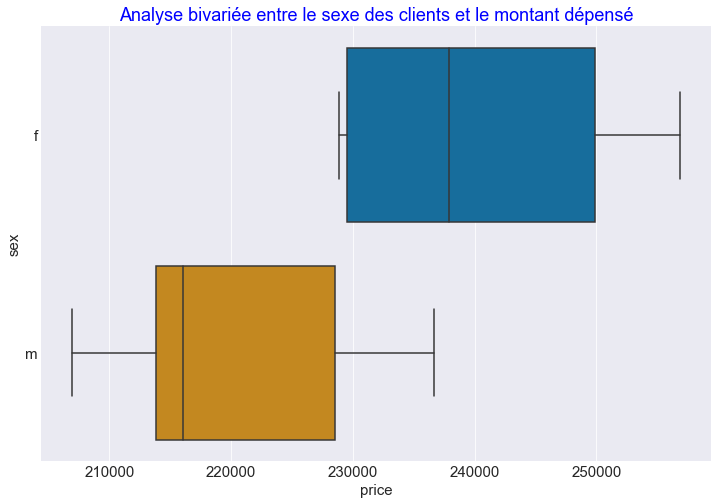

In [102]:
plt.figure(figsize = (12, 8))
sns.boxplot( x=transaction_client_sex["price"], y=transaction_client_sex["sex"] )
medianprops = {"color": "black"}
plt.title("Analyse bivariée entre le sexe des clients et le montant dépensé", color = "blue")
meanprops = {"marker": "o", "markeredgecolor": "black", "markerfacecolor": "firebrick"}
plt.savefig("analyse entre le sex et le montant dépensé")

### 2- Analyse bivariée entre l'âge des clients et la catégorie (une variable quantitative et une variable qualitative)¶ 

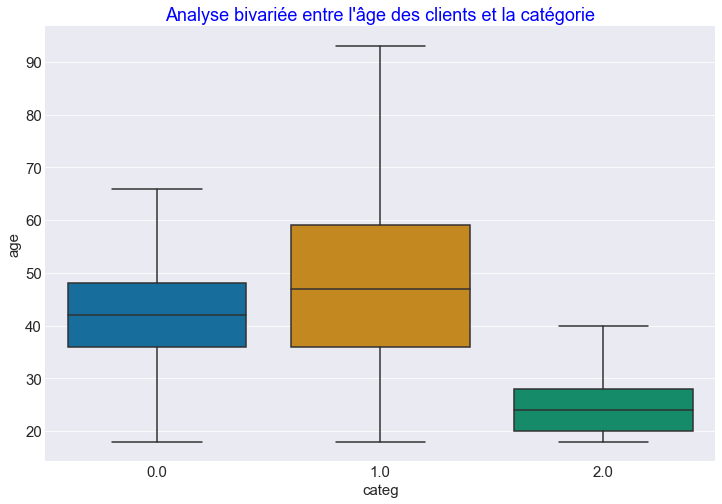

In [103]:
plt.figure(figsize = (12, 8))
plt.title("Analyse bivariée entre l'âge des clients et la catégorie", color = "blue")
sns.boxplot( x=analyse_transaction_sans_octobre["categ"], y=analyse_transaction_sans_octobre["age"], showfliers = False )
plt.savefig("Représentation de l'âge en fonction des catégories")